In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("train_ctrUa4K.csv")
df1=pd.read_csv("test_lAUu6dG.csv")

# preprocessing train dataset (named as df)

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
#to find duplicated rows
duplicates=df[df.duplicated()]
print("Duplicate Rows except first occurrence:\n",duplicates)

Duplicate Rows except first occurrence:
 Empty DataFrame
Columns: [Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, Loan_Status]
Index: []


In [6]:
#to find null values
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
#For numerical variables: imputation using mean or median
#For categorical variables: imputation using mode

In [8]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)

In [9]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
df = df.drop(columns=['Loan_ID'])

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df['Married']=le.fit_transform(df['Married'])
df['Dependents']=le.fit_transform(df['Dependents'])
df['Education']=le.fit_transform(df['Education'])
df['Self_Employed']=le.fit_transform(df['Self_Employed'])
df['Property_Area']=le.fit_transform(df['Property_Area'])
df['Loan_Status']=le.fit_transform(df['Loan_Status'])

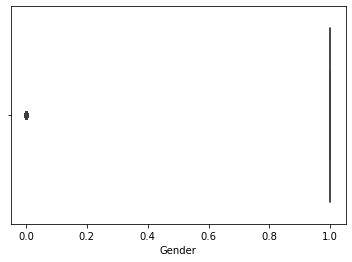

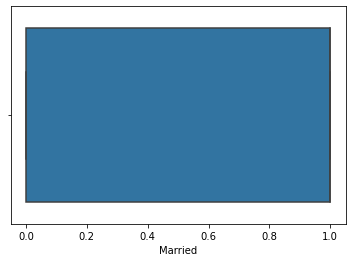

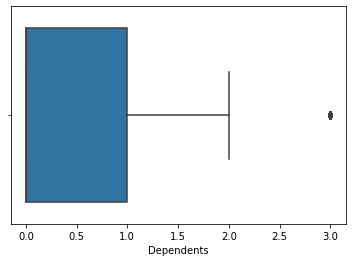

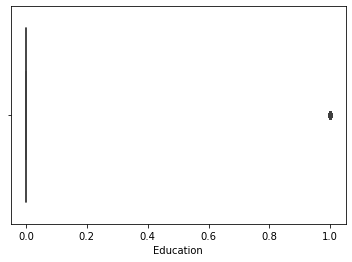

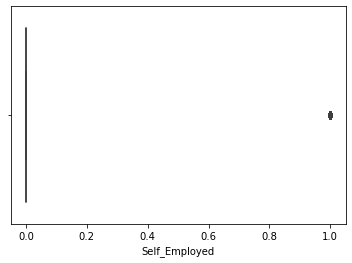

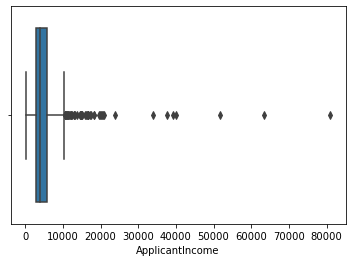

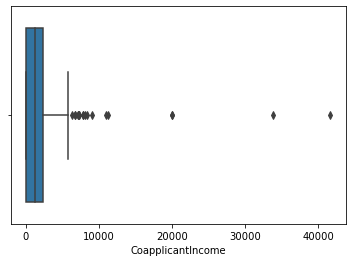

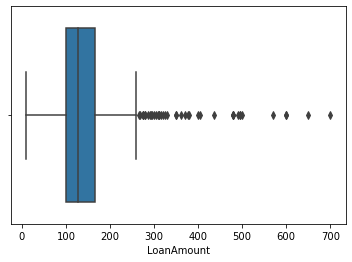

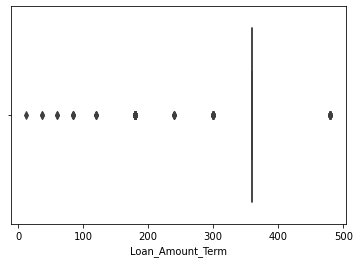

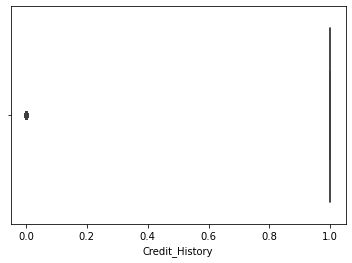

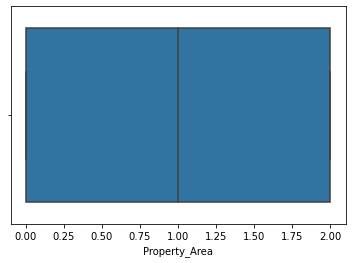

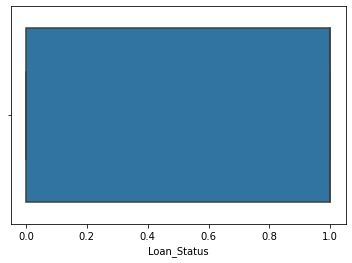

In [12]:
#TO FIND OUTLIERS
for i in df:
    sns.boxplot(x=df[i])
    plt.show()

In [13]:
from scipy import stats
IQR =stats.iqr(df.LoanAmount,interpolation='midpoint')
IQR

64.0

In [14]:
Q1=df.LoanAmount.quantile(0.25)
Q3=df.LoanAmount.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(4.25, 260.75)

In [15]:
df.loc[df['LoanAmount']>max_limit,'LoanAmount']=np.median(df.LoanAmount)
df.loc[df['LoanAmount']<min_limit,'LoanAmount']=np.median(df.LoanAmount)

In [16]:
from scipy import stats
IQR =stats.iqr(df.ApplicantIncome,interpolation='midpoint')
IQR

2911.0

In [17]:
Q1=df.ApplicantIncome.quantile(0.25)
Q3=df.ApplicantIncome.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-1489.0, 10161.5)

In [18]:
df.loc[df['ApplicantIncome']>max_limit,'ApplicantIncome']=np.median(df.ApplicantIncome)
df.loc[df['ApplicantIncome']<min_limit,'ApplicantIncome']=np.median(df.ApplicantIncome)

In [19]:
from scipy import stats
IQR =stats.iqr(df.CoapplicantIncome,interpolation='midpoint')
IQR

2292.5

In [20]:
Q1=df.CoapplicantIncome.quantile(0.25)
Q3=df.CoapplicantIncome.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-3438.75, 5736.0)

In [21]:
df.loc[df['CoapplicantIncome']>max_limit,'CoapplicantIncome']=np.median(df.CoapplicantIncome)
df.loc[df['CoapplicantIncome']<min_limit,'CoapplicantIncome']=np.median(df.CoapplicantIncome)

In [36]:
x = df.drop(columns='Loan_Status')
y = df['Loan_Status']

# preprocessing test dataset (named as df1)

In [37]:
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [38]:
df1.shape

(367, 12)

In [39]:
duplicates=df1[df1.duplicated()]
print("Duplicate Rows except first occurrence:\n",duplicates)

Duplicate Rows except first occurrence:
 Empty DataFrame
Columns: [Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area]
Index: []


In [40]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         367 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      367 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [41]:
df1.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [42]:
df1['Gender'].fillna(df['Gender'].mode()[0], inplace=True) 
df1['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True) 
df1['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True) 
df1['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True) 
df1['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True) 
df1['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [44]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

# LOGISTIC REGRESSION

In [45]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
model=clf.fit(x_train,y_train)

In [46]:
y_pred=model.predict(x_test)

In [47]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print("Accuracy :",accuracy_score(y_test,y_pred))
precision=precision_score(y_test,y_pred,average='weighted')
print("precision :",precision)
recall_score=recall_score(y_test,y_pred,average='weighted')
print("recall_score :",recall_score)
f1_score=f1_score(y_test,y_pred,average='weighted')
print("f1_score :",f1_score)

Accuracy : 0.7886178861788617
precision : 0.8252526249958856
recall_score : 0.7886178861788617
f1_score : 0.7614910090194872


In [48]:
from sklearn.metrics import confusion_matrix

In [49]:
print(confusion_matrix(y_test,y_pred))

[[18 25]
 [ 1 79]]


# KNN

In [50]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric="minkowski",p=2)
    model=classifier.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    metric_k.append(acc)

In [51]:
print( metric_k)

[0.7317073170731707, 0.6829268292682927, 0.7642276422764228, 0.7235772357723578, 0.7804878048780488, 0.7560975609756098, 0.7723577235772358, 0.7723577235772358, 0.7804878048780488, 0.7804878048780488, 0.7804878048780488, 0.7886178861788617]


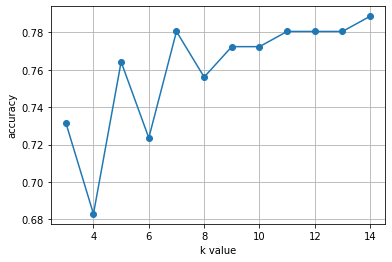

In [52]:
plt.plot(neighbors,metric_k,"o-")
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [53]:
classifier=KNeighborsClassifier(n_neighbors=7,metric="minkowski",p=2)
model1=classifier.fit(x_train,y_train)
y_pred1=model1.predict(x_test)
acc=accuracy_score(y_test,y_pred1)

In [54]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print("Accuracy :",accuracy_score(y_test,y_pred1))
print("precision :",precision_score(y_test,y_pred1,average="weighted"))
print("recall_score :",recall_score(y_test,y_pred1,average="weighted"))
print("f1_score :",f1_score(y_test,y_pred1,average="weighted"))

Accuracy : 0.7804878048780488
precision : 0.8195251000129048
recall_score : 0.7804878048780488
f1_score : 0.7503377027567351


# DECISION TREE

In [55]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train,y_train)
y_pred_dt=dt_clf.predict(x_test)

In [56]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("accuracy :",accuracy_score(y_test,y_pred_dt))
print("confusion matrix:\n",confusion_matrix(y_test,y_pred_dt))

accuracy : 0.6829268292682927
confusion matrix:
 [[25 18]
 [21 59]]


# random forest

In [57]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(random_state=42)
rf_clf.fit(x_train,y_train)
y_pred_rf=rf_clf.predict(x_test)

In [58]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("accuracy :",accuracy_score(y_test,y_pred_rf))
print("confusion matrix:\n",confusion_matrix(y_test,y_pred_rf))

accuracy : 0.7723577235772358
confusion matrix:
 [[18 25]
 [ 3 77]]


# SVM

In [59]:
from sklearn.svm import SVC
svmclf=SVC(kernel='linear')
svmclf.fit(x_train,y_train)
y_pred_svm=svmclf.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print("accuracy :",accuracy_score(y_test,y_pred_svm))
print("confusion matrix:",confusion_matrix(y_test,y_pred_svm))

accuracy : 0.7886178861788617
confusion matrix: [[18 25]
 [ 1 79]]


In [ ]:
#svm and logisticregression models are better